# DATA 211 - Assignment 3
**Name:** Zoya Malik  
**Date:** February 13, 2026

### Question 1

In [19]:
import pandas as pd

# load the crime dataset
crime_data = pd.read_csv('crime.csv')

# focus on the ViolentCrimesPerPop column
violent_crime = crime_data['ViolentCrimesPerPop']

# compute statistical measures
print('Mean:', violent_crime.mean())
print('Median:', violent_crime.median())
print('Standard Deviation:', violent_crime.std())
print('Minimum:', violent_crime.min())
print('Maximum:', violent_crime.max())

# the mean (0.44) is higher than the median (0.39), which suggests the distribution is 
# right-skewed. this means there are some communities with very high crime rates that 
# pull the mean upward. when there are extreme values, the mean is more affected because 
# it uses every value in the calculation. the median only depends on the middle value so 
# extreme values do not change it much.

Mean: 0.44119122257053295
Median: 0.39
Standard Deviation: 0.27635058478113994
Minimum: 0.02
Maximum: 1.0


### Question 2

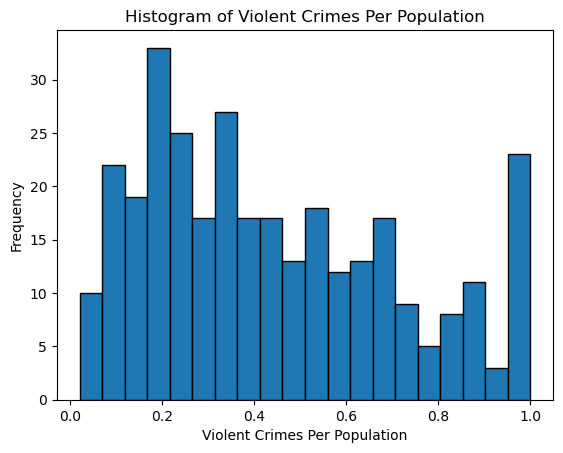

In [20]:
import matplotlib.pyplot as plt

# histogram
plt.figure()
plt.hist(violent_crime, bins=20, edgecolor='black')
plt.title('Histogram of Violent Crimes Per Population')
plt.xlabel('Violent Crimes Per Population')
plt.ylabel('Frequency')
plt.show()


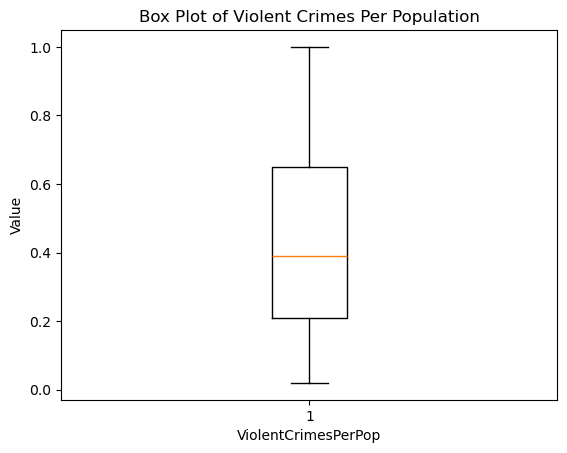

In [21]:
# box plot
plt.figure()
plt.boxplot(violent_crime)
plt.title('Box Plot of Violent Crimes Per Population')
plt.xlabel('ViolentCrimesPerPop')
plt.ylabel('Value')
plt.show()


In [22]:
# the histogram shows that most values are concentrated at the lower end, meaning most
# communities have lower crime rates. there is also a noticeable spike near 1.0 showing
# some communities with very high crime rates. the box plot shows the median line sitting
# in the lower half of the box, which confirms the data leans toward lower values. the
# whiskers extend across the full range and there are no individual points beyond the
# whiskers, so no extreme outliers are detected by the box plot in this case.

### Question 3

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# load the kidney disease dataset
kidney_data = pd.read_csv('kidney_disease.csv')

# clean the classification column
kidney_data['classification'] = kidney_data['classification'].str.strip()

# convert classification to numeric: 0 = ckd (positive), 1 = notckd (negative)
kidney_data['classification'] = kidney_data['classification'].map({'ckd': 0, 'notckd': 1})

# convert columns that should be numeric
kidney_data['pcv'] = pd.to_numeric(kidney_data['pcv'], errors='coerce')
kidney_data['wc'] = pd.to_numeric(kidney_data['wc'], errors='coerce')
kidney_data['rc'] = pd.to_numeric(kidney_data['rc'], errors='coerce')

# select feature columns listed in the dataset description
feature_columns = ['age', 'bp', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# drop rows with missing values
kidney_data = kidney_data.dropna(subset=feature_columns + ['classification'])

# create feature matrix and label vector
feature_matrix = kidney_data[feature_columns]
target_labels = kidney_data['classification']

print('Feature matrix shape:', feature_matrix.shape)
print('Label vector shape:', target_labels.shape)

# split into 70% training and 30% testing
features_train, features_test, labels_train, labels_test = train_test_split(
    feature_matrix, target_labels, test_size=0.30, random_state=42
)

print('Training set size:', features_train.shape[0])
print('Testing set size:', features_test.shape[0])

# we should not train and test on the same data because the model would memorize the 
# training data and appear to perform well, but it would fail on new unseen data. this 
# is called overfitting. the purpose of the testing set is to check how well the model 
# works on new data it has never seen before. this gives a more realistic measure of the 
# model performance.

Feature matrix shape: (226, 8)
Label vector shape: (226,)
Training set size: 158
Testing set size: 68


### Question 4

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# define knn model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# train the model
knn_model.fit(features_train, labels_train)

# predict labels for test data
predicted_labels = knn_model.predict(features_test)

# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(labels_test, predicted_labels))

# performance metrics
print('Accuracy:', accuracy_score(labels_test, predicted_labels))
print('Precision:', precision_score(labels_test, predicted_labels, pos_label=0))
print('Recall:', recall_score(labels_test, predicted_labels, pos_label=0))
print('F1-score:', f1_score(labels_test, predicted_labels, pos_label=0))

# true positive means the model correctly predicts a patient has kidney disease. true 
# negative means the model correctly predicts a patient does not have it. false positive
# means the model says a healthy patient has kidney disease. false negative means the 
# model says a sick patient does not have kidney disease. accuracy alone is not enough 
# because if the classes are imbalanced, a model could get high accuracy by just 
# predicting the majority class every time. if missing a kidney disease case is very 
# serious, recall is the most important metric because it measures how many actual sick 
# patients were correctly found.

Confusion Matrix:
[[10 15]
 [ 7 36]]
Accuracy: 0.6764705882352942
Precision: 0.5882352941176471
Recall: 0.4
F1-score: 0.47619047619047616


### Question 5

   k  Accuracy
0  1  0.779412
1  3  0.661765
2  5  0.676471
3  7  0.661765
4  9  0.632353
Best k: 1 with accuracy: 0.7794117647058824


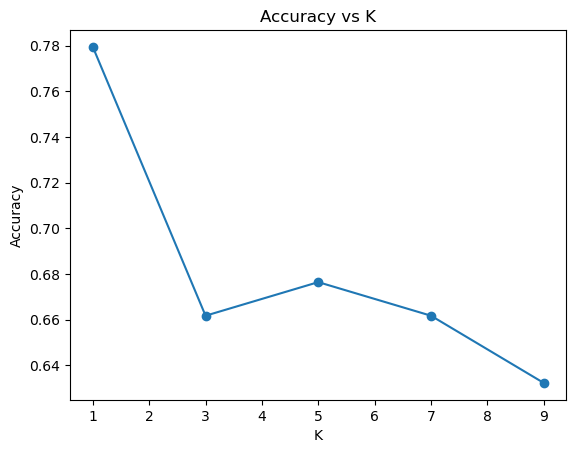

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# test different values of k
accuracy_list = []

for num_neighbors in [1, 3, 5, 7, 9]:
    knn_model = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn_model.fit(features_train, labels_train)
    predicted_labels = knn_model.predict(features_test)
    accuracy = accuracy_score(labels_test, predicted_labels)
    accuracy_list.append(accuracy)

# display results table
results = pd.DataFrame({'k': [1, 3, 5, 7, 9], 'Accuracy': accuracy_list})
print(results)

# find best k
best_k = results.loc[results['Accuracy'].idxmax(), 'k']
best_accuracy = results['Accuracy'].max()
print('Best k:', int(best_k), 'with accuracy:', best_accuracy)

# plot accuracy vs k
plt.figure()
plt.plot([1, 3, 5, 7, 9], accuracy_list, 'o-')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# changing k changes how many neighbors the model looks at to make a prediction. very 
# small values of k like k=1 may cause overfitting because the model only looks at one 
# neighbor and is very sensitive to noise in the training data. very large values of k 
# may cause underfitting because the model looks at too many neighbors and loses the 
# ability to capture local patterns in the data.